In [72]:
using Lattices
using LinearAlgebra
using Combinatorics
using SparseArrays
using Plots
import Graphs
using LaTeXStrings
# using GraphPlot
# using Compose

include("ed_objects.jl")
include("ed_functions.jl")

create_Heisenberg (generic function with 1 method)

In [3]:
# using KrylovKit

t = 1
U = 8
μ = 0 # positive incentivises fewer particles (one electron costs this much energy)
# N_up = 2
# N_down = 2
N = 3
half_filling = false
lattice = Graphs.grid((2,3))
# lattice = Graphs.cycle_graph(3)

model = HubbardModel(t,U,μ,half_filling)
subspace = HubbardSubspace(N, lattice)
# subspace = HubbardSubspace(N_up, N_down, lattice)
H = create_Hubbard(model, subspace)

E, V = eigen(Matrix(H))
# eigsolve(H, 2, :SR)

# E[2] - E[1]
# jldsave(raw"D:\datasets\dqmc_hubbard\ED.jld2"; E=E, V=V,t=t, U=U,mu=μ, half_filling=half_filling, N_up=N_up, N_down=N_down, lattice=lattice)
# Int.(Matrix(H))

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
220-element Vector{Float64}:
 -4.259638127440806
 -4.059638127440806
 -3.651394110388735
 -3.64092712474619
 -3.544886532449995
 -3.4513941103887356
 -3.4409271247461906
 -3.3448865324499946
 -3.2409271247461904
 -3.1166536112707357
  ⋮
  8.1975
  8.1975
  8.1975
  8.1975
  8.197500000000002
  8.197500000000003
  8.197500000000005
  8.197500000000005
  8.197500000000018
vectors:
220×220 Matrix{Float64}:
 0.0  0.0  0.0   0.176777     0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  -0.176777     0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  -0.25         0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.25         0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.25         0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  -9.12993e-18  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  -0.176777     0.0  0.0     0.0  0.0  0.0  0.0  0.

In [19]:
ci = CombinationIndexer(collect(1:nv(lattice)), N_up, N_down)
state_probability = abs.(V[1:end,1]).^2
println(maximum(state_probability))
combination(ci, argmax(state_probability))

0.2905654555379272


(Set([4, 1]), Set([2, 3]))

In [ ]:
using JLD2

jldsave(raw"D:\datasets\dqmc_hubbard\ED.jld2"; E=E, V=U,t=1, U=8,mu=2, half_filling=true, N_up=4, N_down=4, lattice=lattice)

In [4]:
using JLD2

d = load(raw"D:\datasets\dqmc_hubbard\ED.jld2")
V = d["V"]
lattice = d["lattice"]
t = d["t"]
E = d["E"]
μ = d["mu"]
N_up = d["N_up"]
N_down = d["N_down"]

4

# eigenstate comparison

In [64]:
# using KrylovKit

t = 1
U = 6
μ = 0  # positive incentivises fewer particles (one electron costs this much energy)
# N_up = 2
# N_down = 2
N = 4
half_filling = false
# lattice = Chain(6, Periodic())
lattice = Square((2,3), Periodic())
# lattice = Graphs.cycle_graph(3)

model = HubbardModel(t,U,μ,half_filling)
subspace = HubbardSubspace(N, lattice)
# subspace = HubbardSubspace(N_up, N_down, lattice)

op1 = Matrix(create_operator(subspace,:Sx))
op2 = Matrix(create_operator(subspace,:S2))
# op3 = Matrix(create_operator(subspace,:L2))
op3 = Matrix(create_operator(subspace,:T, kind=1))
op4 = Matrix(create_operator(subspace,:T, kind=2))
E = []
H = []
V = []
for perturbation ∈ [false, true]
    push!(H, create_Hubbard(model, subspace; perturbations=perturbation))
    e, v = eigen(Matrix(H[end]))
    push!(E, e)
    push!(V, v)
end

for i ∈ 1:2
    println(degeneracy_count(E[i]))
end

h1 = Matrix(H[1])
h2 = Matrix(H[2])
# println(sum(abs.(h1*h2-h2*h1)))
println(sum(abs.(op3*h1-h1*op3)))
println(sum(abs.(op1*h1-h1*op1)))
println(sum(abs.(op3*h1-h1*op3)))
println(sum(abs.(op2*op3-op3*op2)))
println(sum(abs.(op2*op1-op1*op2)))
println(sum(abs.(op1*op3-op3*op1)))
# H1 = create_Hubbard(model, subspace; perturbations=false)
# E1 = diag(V1'*Matrix(H1)*V1)


Dict{Any, Any}(5 => 3, 4 => 4, 6 => 34, 20 => 2, 2 => 34, 10 => 2, 9 => 1, 3 => 31)
Dict{Any, Any}(5 => 3, 20 => 2, 10 => 2, 3 => 105)
0.0
0.0
0.0
0.0
0.0
0.0


In [47]:
using DataStructures

h_tmp = copy(h1)
E,V = eigen(Matrix(op3))
println(counter(round.(angle.(E)/(2*pi)*360)))
h_tmp = real.(filter_matrix_by_vector(V'*h_tmp*V, E, 1))
E,V = eigen(h_tmp)
degeneracy_count(E)
# counter(round.(E*100))

Accumulator(0.0 => 39, 60.0 => 36, 180.0 => 36, 120.0 => 39, -60.0 => 36, -120.0 => 39)


Dict{Any, Any} with 3 entries:
  7 => 1
  2 => 7
  3 => 1

In [82]:
any(abs.(6.929646192794502 .- eigvals(h1)) .< 1e-10)

true

In [81]:
H_sub, eigvalues, inds, V = filter_subspace(h1, [op1, op2, op3, op4], [2, 1,1,1])
real.(eigvals(H_sub))

17-element Vector{Float64}:
 -3.7407144843030764
 -2.9991975802402377
 -1.7965484041154056
 -0.6570170017378326
  0.05179025075693287
  1.0343515370904415
  1.8744001335172464
  3.446158972041593
  4.375460062822828
  4.637550543577928
  4.999999999999994
  6.053317450373012
  6.929646192794502
  7.117671437020694
  7.841956033421681
  8.669802614093838
 10.16137224288573

In [26]:
eigvalues

4-element Vector{Any}:
  0.0
  0.0
  1.0
 -0.9999999999999989

In [101]:
eigenvalue_of_qn(eigvals(op1))

5-element Vector{Any}:
 -4.000000000000004
 -2.0000000000000036
 -1.2632142320252585e-14
  1.999999999999992
  3.9999999999999907

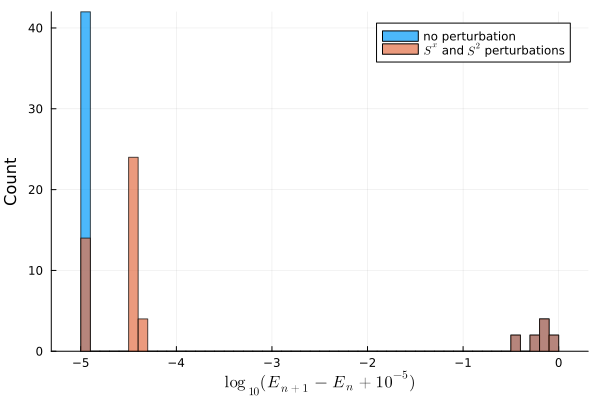

In [17]:
using StatsBase
epsilon = 1e-5

histogram(log10.(diff(real.(E[1])).+1e-5),bins=-5:0.1:0, label="no perturbation", ylabel="Count", xlabel=L"\log_{10}(E_{n+1}-E_{n}+10^{-5})",alpha=0.7)
histogram!(log10.(diff(real.(E[2])).+1e-5),bins=-5:0.1:0, label=L"$S^x$ and $S^2$ perturbations",alpha=0.7)
# plot!([0,250],[epsilon, epsilon],color="black")
# plot!(diff(E2))
# savefig("3x3_N=5_perturbation_effect.pdf")

In [ ]:
s1 = Set(findall(x-> (x<1e-6), diff(E1)))
s2 = Set(findall(x-> (x<1e-6), diff(E2)))
println(length(setdiff(union(s1,s2),symdiff(s1, s2))) - min(length(s2), length(s1)))

setdiff(s1, s2)

-4


Set{Int64} with 4 elements:
  484
  627
  505
  620

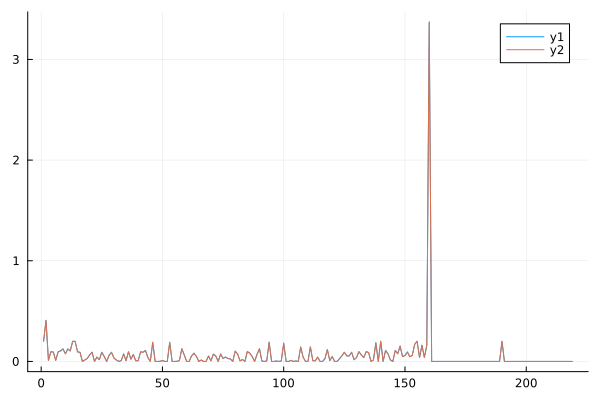

In [13]:
plot(abs.(diff(diag(V1'*H2*V1))))
plot!(abs.(diff(diag(V2'*H2*V2))))

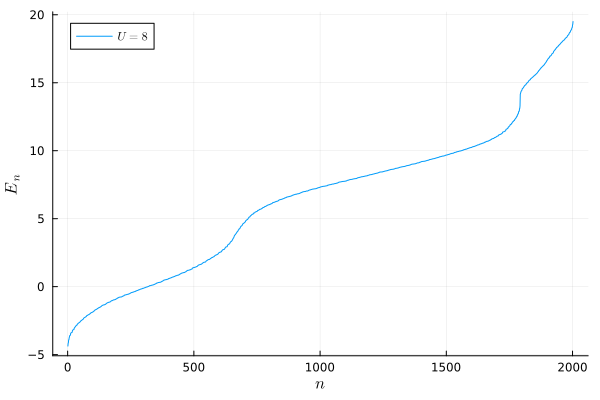

In [241]:
plot(E1, label=L"U=8", xlabel=L"n", ylabel=L"E_n")
# plot!(E2, label=L"U=16")
# plot!(E3, label=L"U=4")
# plot!(E5, label=L"U=7")
# plot!(E1,label=L"U=8")
# plot!(E6, label=L"U=10")
# savefig("3x3_mu=0_N=5.pdf")

In [57]:
# using KrylovKit

t = 1
U = 5
μ = 0 # positive incentivises fewer particles (one electron costs this much energy)
# N_up = 1:4
# N_down = 1:4
N = 5
half_filling = false
lattice = Graphs.grid((2,3))
# lattice = Graphs.cycle_graph(3)

model = HubbardModel(t,U,μ,half_filling)
subspace = HubbardSubspace(N, lattice)
# subspace = HubbardSubspace(N_up, N_down, lattice)
H2 = create_Hubbard(model, subspace;perturbations=false)

E3, V2 = eigen(Matrix(H2))
# cicj_array2 = create_cicj(subspace)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
792-element Vector{Float64}:
 -4.143831527044879
 -4.143831527044869
 -3.9160449051269435
 -3.9160449051269364
 -3.8232158128375726
 -3.823215812837569
 -3.609348953242156
 -3.609348953242149
 -3.609348953242149
 -3.6093489532421454
  ⋮
 13.451338676123767
 13.609348953242142
 13.609348953242145
 13.823215812837566
 13.823215812837566
 13.916044905126942
 13.916044905126942
 14.14383152704487
 14.14383152704487
vectors:
792×792 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0

In [43]:
U = V1'*V2 # energy basis
# sum(abs.(V1*U - V2))

p = abs.(U).^2
entropy = ifelse.(p .> 0, -p .* log.(p), 0)
# sum(entropy, dims=1)[1:7]
println(sqrt(tr((U-I)*(U-I)')))
sort(collect(Iterators.flatten(sum(entropy, dims=1))))

21.164111439747483


220-element Vector{Real}:
 -1.3322676294594337e-15
 -1.3322675877401919e-15
 -8.881784196489471e-16
 -8.881784152110461e-16
 -8.881783946470448e-16
 -8.881783728964097e-16
 -8.881781775751524e-16
 -4.4408920984410603e-16
 -4.4408920984340616e-16
 -4.440892094559743e-16
 -4.4408920901550995e-16
 -4.4408920843433108e-16
 -4.440892017035139e-16
  ⋮
  2.112446709904766
  2.117842350510945
  2.1233866932571486
  2.131917590078454
  2.1538853908616704
  2.1563823776925948
  2.183380225527846
  2.215692199846435
  2.315467625742235
  2.315467625745109
  2.350202161265325
  2.350202161265331

In [26]:
U = V2*V1' # computational basis 

# this unitary makes more sense to compute the quantum complexity of
p = abs.(U).^2
entropy = ifelse.(p .> 0, -p .* log.(p), 0)
sum(entropy, dims=1)[1:7]

7-element Vector{Float64}:
 4.67502010839971
 4.680287262859502
 4.659354108209212
 4.424107517776376
 4.6178977430646215
 4.729190837543825
 4.55988444900022

In [203]:
sort(diag(U))

56-element Vector{Float64}:
 -0.3622350403989767
 -0.2992150624609179
 -0.28993672285175137
 -0.21152239006569346
 -0.18832856913509408
 -0.1797076847870786
 -0.16965019734967052
 -0.16877421666506393
 -0.14366475399341608
 -0.13935394727038908
  ⋮
  0.10492454137675775
  0.12499828731651998
  0.12499915911691023
  0.2006406396609804
  0.20268272751856967
  0.24772500474752243
  0.3003698974614383
  0.3727207820225861
  0.420179608426703

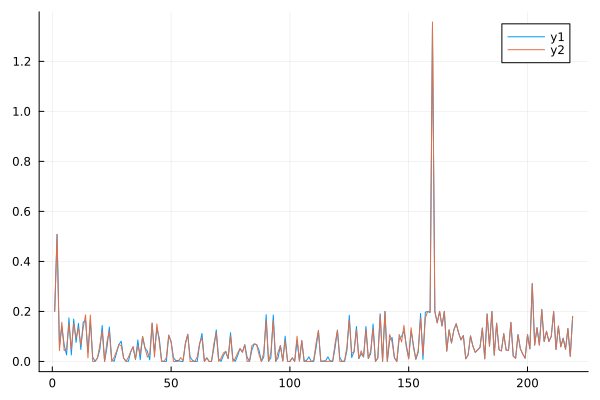

In [58]:
using Plots
plot(diff(E1))
plot!(diff(E2))

In [176]:
cicj = [dot(V2[:,3], cicj_array2[i,j,k]*V2[:,3]) for i=1:4, j=1:4, k=1:2]
for i=1:4
    println(cicj[i,i,1] + cicj[i,i,2])
end

0.749277920394003
0.7507255718773945
0.7507221048571685
0.7492744028714353


# Heisenberg 

In [5]:
N=2
lattice = Graphs.grid((2,2))
# lattice = Graphs.cycle_graph(3)

subspace = HubbardSubspace(N, lattice)
# subspace = HubbardSubspace(N_up, N_down, lattice)
h,indexer = create_Heisenberg(1.0, 0.5, subspace)

E,V = eigen(Matrix(h))
println(E)
psi0 = maximum(V[:,1])
for (i, psi) in enumerate(V[:,1])
    if abs.(psi) > 1e-8
        println(psi, " ", combination(indexer, i))
    end
end

[-3.22817805262833, -1.8789024427351722, -1.8789024427351722, -1.8789024427351713, -1.8789024427351713, -1.8789024427351713, -1.8789024427351642, -0.7500000000000022, -0.7499999999999953, -0.7499999999999949, 0.0, 0.0, 5.204170427930421e-17, 5.174920444975781e-16, 2.7555905900771413e-15, 0.25000000000000067, 0.2500000000000009, 0.2500000000000018, 0.2500000000000018, 0.250000000000002, 0.250000000000002, 2.1289024427351744, 2.1289024427351744, 2.128902442735175, 2.128902442735175, 2.128902442735175, 2.1289024427351753, 2.4781780526283317]
-0.2659220264360266 (Set([1]), Set([2]))
-0.2659220264360278 (Set([1]), Set([3]))
0.3295010648121068 (Set([1]), Set([4]))
0.26592202643602886 (Set([2]), Set([1]))
0.3295010648121091 (Set([2]), Set([3]))
-0.26592202643602775 (Set([2]), Set([4]))
0.2659220264360277 (Set([3]), Set([1]))
-0.32950106481210656 (Set([3]), Set([2]))
-0.2659220264360278 (Set([3]), Set([4]))
-0.32950106481210883 (Set([4]), Set([1]))
0.2659220264360276 (Set([4]), Set([2]))
0.265